#                                                   Accident  Severity Predictor

##  Introduction           

Driving is a necessity now for various reasons. People need to drive for work, for attending personal trips, for droping family members, for shopping etc. Having a personal car and ability to drive actually make a person independent.


However with the heavy traffic, driving skills, bad weather chances of happening an accidents are very high. The chaos that an accident make will really damage the life of impacted people it can even cause death.If there is a way that can let people know the chances of getting into an accident and the severity of accident they can take some precautionary measure to avoid it.This project aims to build a model that predict the severity of accident. Using superwised machine learning techniques a model can be created that will predict the severity of accidents that can happen based on the data collected from past years.

Target Audience would be the citizens of Seattle with a driving license.


## DataSource

The dataset contains collision data collected from 2004 to 2020 from Seattle, WA, SDOT traffic department.
Data consist of 194763 entries with 38 columns. With accident serverity as the predicting variable, features such as date and time of incident, collision type, junction type, location, weather condition, road condition, light condition, Car speeding, and under the influence of drug , inattentdence, pedestrian rights will be used for this analysis. This dataset is imbalance with majority of the serverity in properties damage only collision, which makes up about 70% of the data, making classification more difficult. Nonetheless, the data is understand thoroughly at first using exploratory analysis.

In [5]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("C:\Ceema\Data Science Course Era\FinalCapstone\Data-Collisions.csv")
df.shape

(194673, 38)

In [8]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Checking for missing data

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [17]:
i = 0
for col in missing_data.columns.values.tolist():
    print(col," ", i)
    i = i+1
    print(missing_data[col].value_counts())
    print("")

SEVERITYCODE   0
False    194673
Name: SEVERITYCODE, dtype: int64

X   1
False    189339
True       5334
Name: X, dtype: int64

Y   2
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID   3
False    194673
Name: OBJECTID, dtype: int64

INCKEY   4
False    194673
Name: INCKEY, dtype: int64

COLDETKEY   5
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO   6
False    194673
Name: REPORTNO, dtype: int64

STATUS   7
False    194673
Name: STATUS, dtype: int64

ADDRTYPE   8
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY   9
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION   10
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE   11
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC   12
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1   13
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC   14
False    194673
Name: SEVERITYDESC, dt

This shows 18 columns (X,Y,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE   ,EXCEPTRSNDESC,COLLISIONTYPE,JUNCTIONTYPE, INATTENTIONIND,UNDERINFL,WEATHER   ,ROADCOND   ,LIGHTCOND   ,PEDROWNOTGRNT   ,SDOTCOLNUM   ,SPEEDING  ,ST_COLCODE   ,ST_COLDESC )   Whole columns should be dropped only if most entries in the column have missing data.

In [ ]:
Lets see what are the different type of severity

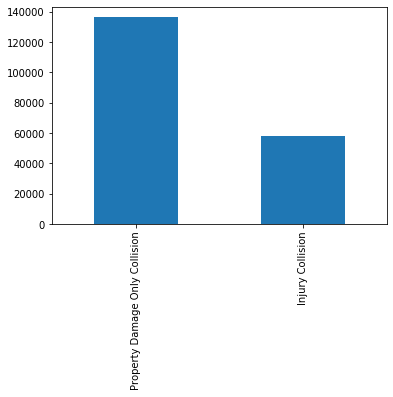

In [18]:
df['SEVERITYDESC'].value_counts().plot(kind='bar')   

This shows there are only 2 types of severity which is Property Damaage only collision and Injury Collision

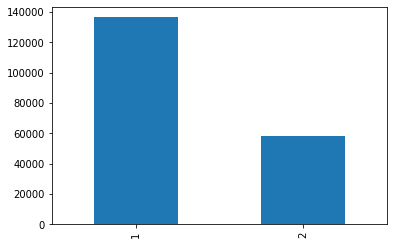

In [21]:
df['SEVERITYCODE'].value_counts().plot(kind='bar')   

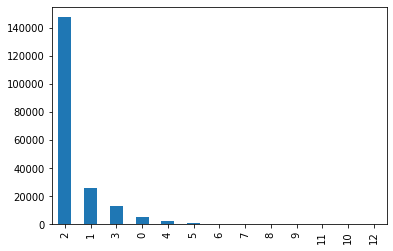

In [22]:
df['VEHCOUNT'].value_counts().plot(kind='bar')   

This shows more accidents happened with 2 vehicle collision

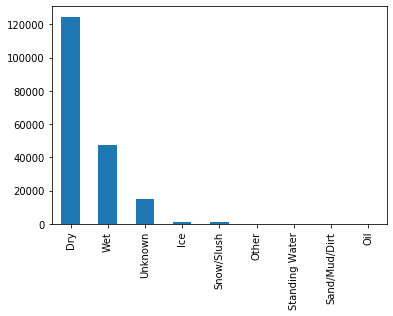

In [23]:
df['ROADCOND'].value_counts().plot(kind='bar')   

In [ ]:
This shows nore accident happened for Dry Roadcondition

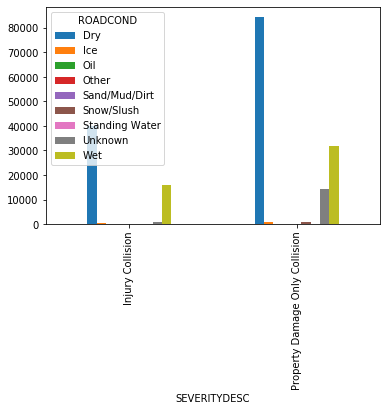

In [30]:
df.groupby(['SEVERITYDESC','ROADCOND']).ROADCOND.count().unstack().plot(kind='bar')

This way by grouping by we can find out what are the significant features that lead to different severity types.